### Tên dataset được sử dụng : Churn Modelling 
### Mô tả : Dataset chưa thông tin của khách hàng và biến mục tiêu là giá trị nhị phân thể hiện khách hàng có còn là khách hàng của ngân hàng nữa hay không 

Trước khi sử dụng các phương pháp để đánh giá các đặc trưng của bài toán thì chúng ta sẽ dùng kinh nghiệm và sự hiểu biết để tìm ra đâu là những đặc trưng quan trọng nhất.
Trong tập dữ liệu Churn_Modelling.csv, có các đặc trưng (features) sau:
+ RowNumber: Số thứ tự của dòng dữ liệu.
+ CustomerId: Mã khách hàng.
+ Surname: Họ của khách hàng.
+ CreditScore: Điểm tín dụng của khách hàng.
+ Geography: Quốc gia của khách hàng.
+ Gender: Giới tính của khách hàng.
+ Age: Tuổi của khách hàng.
+ Tenure: Thời gian đã ở trong ngân hàng (số năm).
+ Balance: Số dư trong tài khoản của khách hàng.
+ NumOfProducts: Số lượng sản phẩm ngân hàng mà khách hàng sở hữu.
+ HasCrCard: Có thẻ tín dụng không (1: Có, 0: Không).
+ IsActiveMember: Thành viên hoạt động (1: Hoạt động, 0: Không hoạt động).
+ EstimatedSalary: Mức lương ước tính của khách hàng.
+ Exited: Trạng thái rời bỏ (1: Rời bỏ, 0: Không rời bỏ).
Vai trò của các đặc trưng đối với mục tiêu bài toán (dự đoán khách hàng có rời bỏ ngân hàng hay không) có thể được đánh giá như sau:
+ CreditScore: Điểm tín dụng có thể ảnh hưởng đến khả năng thanh toán và sự ổn định tài chính của khách hàng. Các điểm tín dụng cao có thể cho thấy khách hàng có khả năng thanh toán nợ cao hơn và có thể giảm khả năng rời bỏ ngân hàng.
+ Geography: Quốc gia có thể liên quan đến các yếu tố văn hóa, kinh tế và chính trị. Những yếu tố này có thể ảnh hưởng đến quyết định của khách hàng về việc rời bỏ ngân hàng.
+ Gender: Giới tính có thể liên quan đến các sở thích, nhu cầu và lựa chọn tài chính của khách hàng. Tuy nhiên, việc đánh giá vai trò của giới tính trong bài toán này cần được xem xét kỹ lưỡng để tránh đánh đồng và phân biệt đối xử.
+ Age: Tuổi có thể ảnh hưởng đến sự ổn định công việc, tình hình tài chính và nhu cầu sử dụng sản phẩm ngân hàng. Những khách hàng trẻ tuổi có thể có xu hướng di chuyển và thay đổi ngân hàng nhiều hơn.
+ Tenure: Thời gian đã ở trong ngân hàng có thể phản ánh sự trung thành và hài lòng của khách hàng. Khách hàng có thâm niên lâu hơn có thể ít có khả năng rời bỏ ngân hàng.
+ Balance: Số dư trong tài khoản có thể cho thấy mức độ tài chính và hoạt động giao dịch của khách hàng. Các khách hàng có số dư lớn có thể ít có khả năng rời bỏ ngân hàng.
+ NumOfProducts: Số lượng sản phẩm ngân hàng mà khách hàng sở hữu có thể phản ánh mức độ tương tác và liên kết với ngân hàng. Những khách hàng sở hữu nhiều sản phẩm có thể có lòng trung thành cao hơn và ít có khả năng rời bỏ.
+ HasCrCard: Việc có thẻ tín dụng có thể ảnh hưởng đến sự tiện lợi và khả năng sử dụng dịch vụ của khách hàng. Tuy nhiên, vai trò của đặc trưng này không quyết định duy nhất đối với việc rời bỏ ngân hàng.
+ IsActiveMember: Thành viên hoạt động có thể phản ánh mức độ tương tác và cam kết của khách hàng đối với ngân hàng. Những thành viên hoạt động có thể ít có khả năng rời bỏ ngân hàng.
+ EstimatedSalary: Mức lương ước tính có thể ảnh hưởng đến khả năng thanh toán và sự ổn định tài chính của khách hàng. Những khách hàng có mức lương cao có thể ít có khả năng rời bỏ ngân hàng.

In [32]:
import pandas as pd
import numpy as np

In [33]:
filename='Churn_Modelling.csv'
df = pd.read_csv(filename)
df.head(5)
print(df.shape)

(10000, 14)


In [34]:
df = df.drop("CustomerId", axis=1)
df = df.drop("RowNumber", axis=1)

In [35]:
name=list(df.columns)

### BIỂU ĐỒ THỐNG KÊ

In [36]:
import matplotlib.pyplot as plt

age = []
esti = []
for i in df[name[4]]:
    age.append(i)
for i in df[name[-2]]:
    esti.append(i)
# Sử dụng hàm zip() để kết hợp các phần tử từ hai mảng
zipped_data = zip(age, esti)
X = tuple(zipped_data)
sum_by_key = {}
for key, value in X:
    if key in sum_by_key:
        sum_by_key[key] += value
    else:
        sum_by_key[key] = value
# Sắp xếp tăng dần theo keys và tạo một danh sách các cặp key-value
sorted_items = sorted(sum_by_key.items())

# Tạo dictionary mới từ danh sách đã sắp xếp
sorted_dict = dict(sorted_items)

age_array = list(sorted_dict.keys())
esti_array = []
for i in sorted_dict.values():
    esti_array.append(round(i))

In [37]:
def count_occurrences(arr):
    # Sử dụng dictionary để lưu trữ số lần xuất hiện của mỗi phần tử
    occurrences = {}

    # Đếm số lần xuất hiện của từng phần tử trong mảng
    for num in arr:
        if num in occurrences:
            occurrences[num] += 1  
        else:
            occurrences[num] = 1

    return occurrences

result = count_occurrences(age)

age_sort = sorted(result.items())
sorted_dict_age = dict(age_sort)
age_array = list(sorted_dict_age.keys())
sl_array = list(sorted_dict_age.values())

In [38]:
ten = []
for i in df[name[5]]:
    ten.append(i)
ten_res = count_occurrences(ten)
# Sắp xếp tăng dần theo keys và tạo một danh sách các cặp key-value
sorted_items_1 = sorted(ten_res.items())

# Tạo dictionary mới từ danh sách đã sắp xếp
sorted_dict_1 = dict(sorted_items_1)
ten_ind_array = list(sorted_dict_1.keys())
ten_array = []
for i in sorted_dict_1.values():
    ten_array.append(round(i))

In [39]:
num = []
for i in df[name[7]]:
    num.append(i)
num_res = count_occurrences(num)
# Sắp xếp tăng dần theo keys và tạo một danh sách các cặp key-value
sorted_items_2 = sorted(num_res.items())

# Tạo dictionary mới từ danh sách đã sắp xếp
sorted_dict_2 = dict(sorted_items_2)
num_ind_array = list(sorted_dict_2.keys())
num_array = []
for i in sorted_dict_2.values():
    num_array.append(round(i))

In [40]:
cre = []
for i in df[name[1]]:
    cre.append(i)
cre_res = count_occurrences(cre)
# Sắp xếp tăng dần theo keys và tạo một danh sách các cặp key-value
sorted_items_3 = sorted(cre_res.items())

# Tạo dictionary mới từ danh sách đã sắp xếp
sorted_dict_3 = dict(sorted_items_3)
cre_ind_array = list(sorted_dict_3.keys())
cre_array = []
for i in sorted_dict_3.values():
    cre_array.append(round(i))

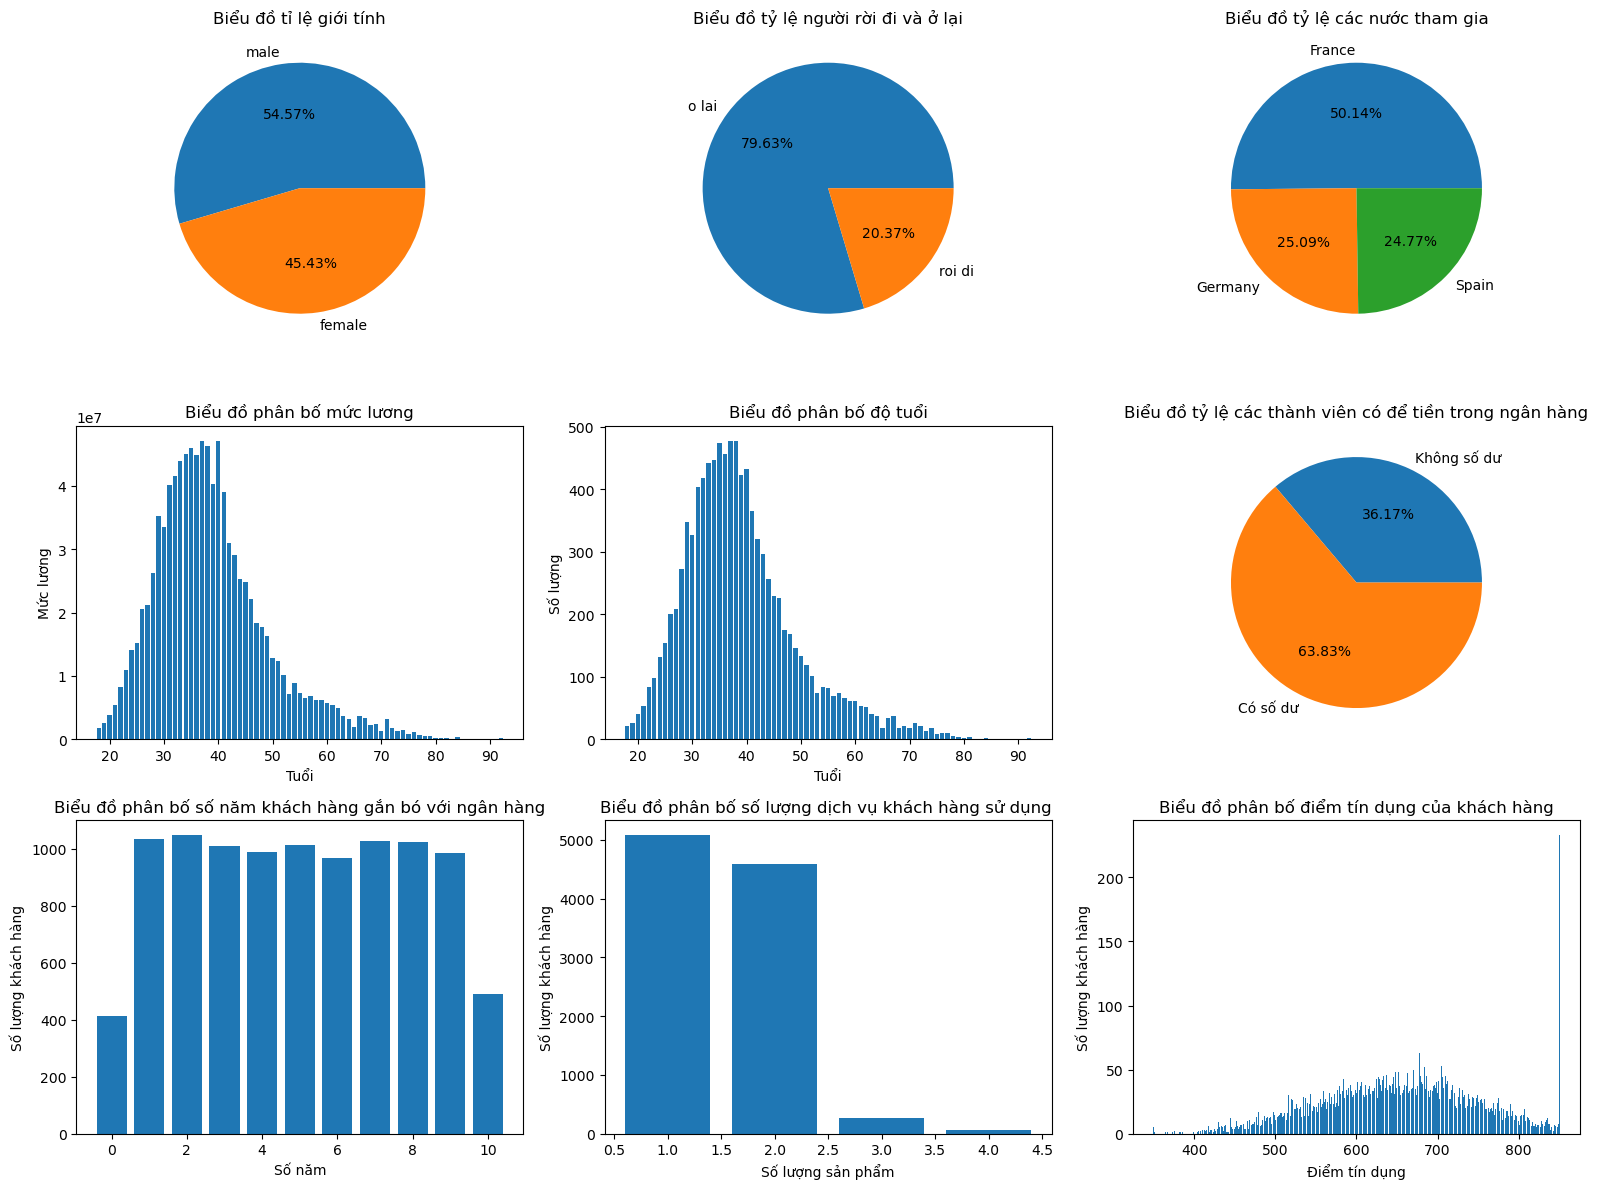

In [41]:
fig, ax = plt.subplots(3, 3, figsize=(16,12))

plt.subplots_adjust(left=0.0, bottom=0.1, right=0.8, top=0.9)
g = df[name[3]].value_counts()
gen = np.array([g[0], g[1]])
gioitinh = ['male', 'female']
ax[0,0].pie(gen, labels = gioitinh, autopct='%1.2f%%')
ax[0,0].set_title('Biểu đồ tỉ lệ giới tính')


plt.subplots_adjust(left=0.0, bottom=0.1, right=0.9, top=0.9)
j = df[name[-1]].value_counts()
ro = np.array([j[0],j[1]])
olai = ['o lai', 'roi di']
ax[0,1].pie(ro, labels = olai, autopct='%1.2f%%')
ax[0,1].set_title('Biểu đồ tỷ lệ người rời đi và ở lại')

plt.subplots_adjust(left=0.0, bottom=0.1, right=0.9, top=0.9)
geo = df[name[2]].value_counts()
geo_array = np.array([geo[0],geo[1], geo[2]])
geo_lable = ['France', 'Germany', 'Spain']
ax[0,2].pie(geo_array, labels = geo_lable, autopct='%1.2f%%')
ax[0,2].set_title('Biểu đồ tỷ lệ các nước tham gia')

plt.subplots_adjust(left=0.0, bottom=0.1, right=0.9, top=0.9)
ax[1,0].bar(age_array,esti_array)
ax[1,0].set_xlabel('Tuổi')
ax[1,0].set_ylabel('Mức lương')
ax[1,0].set_title('Biểu đồ phân bố mức lương')

plt.subplots_adjust(left=0.0, bottom=0.1, right=0.9, top=0.8)
ax[1,1].bar(age_array, sl_array)
ax[1,1].set_xlabel('Tuổi')
ax[1,1].set_ylabel('Số lượng')
ax[1,1].set_title('Biểu đồ phân bố độ tuổi')

plt.subplots_adjust(left=0.0, bottom=0.1, right=0.9, top=0.9)
bal = df[name[6]].value_counts()
bal_array = np.array([3617, 6383])
bal_lable = ['Không số dư', 'Có số dư']
ax[1,2].pie(bal_array, labels = bal_lable, autopct='%1.2f%%')
ax[1,2].set_title('Biểu đồ tỷ lệ các thành viên có để tiền trong ngân hàng')

plt.subplots_adjust(left=0.0, bottom=0.1, right=0.9, top=0.9)
ax[2,0].bar(ten_ind_array,ten_array)
ax[2,0].set_xlabel('Số năm')
ax[2,0].set_ylabel('Số lượng khách hàng')
ax[2,0].set_title('Biểu đồ phân bố số năm khách hàng gắn bó với ngân hàng')

plt.subplots_adjust(left=0.0, bottom=0.1, right=0.9, top=0.9)
ax[2,1].bar(num_ind_array,num_array)
ax[2,1].set_xlabel('Số lượng sản phẩm')
ax[2,1].set_ylabel('Số lượng khách hàng')
ax[2,1].set_title('Biểu đồ phân bố số lượng dịch vụ khách hàng sử dụng ')

plt.subplots_adjust(left=0.0, bottom=0.1, right=0.9, top=0.9)
ax[2,2].bar(cre_ind_array,cre_array)
ax[2,2].set_xlabel('Điểm tín dụng')
ax[2,2].set_ylabel('Số lượng khách hàng')
ax[2,2].set_title('Biểu đồ phân bố điểm tín dụng của khách hàng')

fig.tight_layout()
plt.show()

In [42]:
df =df.drop("Surname",axis=1)

In [43]:
name=list(df.columns)

In [44]:
types =df.dtypes
print(types)

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


In [45]:
# Xử lý giá trị thiếu (nếu có)
df.dropna(inplace=True)

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in range(0,len(types)):
    if types[i]=='object':
            le.fit_transform(df[name[i]])
            df[name[i]]=le.transform(df[name[i]])

In [47]:
data= df.values
x= data[:,:-1]
y= data[:,-1]
print(x[0])
print(y[0])

[6.1900000e+02 0.0000000e+00 0.0000000e+00 4.2000000e+01 2.0000000e+00
 0.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0134888e+05]
1.0


In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()
scaler.fit(x)
X_scaler =scaler.transform(x)
print(X_scaler[0])

[0.538      0.         0.         0.32432432 0.2        0.
 0.         1.         1.         0.50673489]


In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=\
train_test_split(X_scaler,y,test_size=0.2,random_state=42)
print(y_train)

[0. 0. 1. ... 1. 1. 0.]


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


In [51]:
# Initialize the models
Logistic_reg = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors (k) as needed
tree=DecisionTreeClassifier()
gaussian_nb = GaussianNB()

# Train the models
Logistic_reg.fit(x_train, y_train)
knn.fit(x_train, y_train)
tree.fit(x_train, y_train)
gaussian_nb.fit(x_train, y_train)
# Make predictions
y_pred_log = Logistic_reg.predict(x_test)
y_pred_knn = knn.predict(x_test)
y_pred_tree= tree.predict(x_test)
y_pred_gaussian = gaussian_nb.predict(x_test)
print(y_pred_log)
print(y_pred_knn)
print(y_pred_tree)
print(y_pred_gaussian)

[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 1. 0. 1.]
[0. 0. 0. ... 1. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]


In [52]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
# Evaluate Linear Regression
print("LogisticRegression:")
print(classification_report(y_test, y_pred_log))
accuracy_log = accuracy_score(y_test, y_pred_log)

# Evaluate K-Nearest Neighbors
print("\nK-Nearest Neighbors:")
print(classification_report(y_test, y_pred_knn))
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Evaluate DecisionTree
print("\nDecisionTree")
print(classification_report(y_test, y_pred_tree))
accuracy_tree = accuracy_score(y_test, y_pred_tree)

# Evaluate Gaussian
print("\nGaussian:")
print(classification_report(y_test, y_pred_gaussian))
accuracy_gaussian = accuracy_score(y_test, y_pred_gaussian)

LogisticRegression:
              precision    recall  f1-score   support

         0.0       0.83      0.97      0.89      1607
         1.0       0.61      0.17      0.27       393

    accuracy                           0.82      2000
   macro avg       0.72      0.57      0.58      2000
weighted avg       0.79      0.82      0.77      2000


K-Nearest Neighbors:
              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89      1607
         1.0       0.55      0.39      0.46       393

    accuracy                           0.82      2000
   macro avg       0.71      0.66      0.67      2000
weighted avg       0.80      0.82      0.81      2000


DecisionTree
              precision    recall  f1-score   support

         0.0       0.88      0.85      0.86      1607
         1.0       0.46      0.53      0.49       393

    accuracy                           0.78      2000
   macro avg       0.67      0.69      0.68      2000
weighted avg      

### Biểu đồ so sánh acc của các mô hình LogisticRegression, K-Nearest Neighbors, DecisionTree, Gaussian

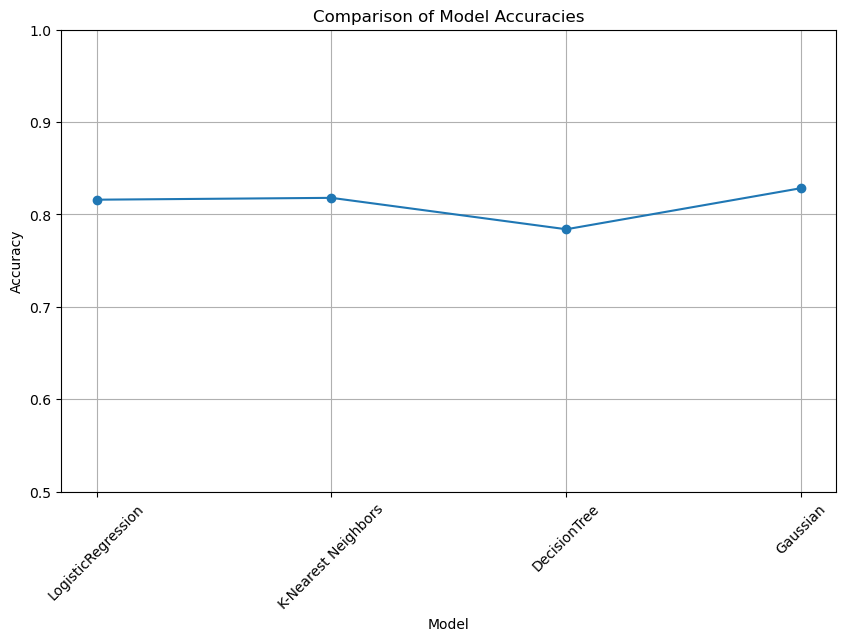

In [53]:
import matplotlib.pyplot as plt

accuracies = [accuracy_log, accuracy_knn, accuracy_tree, accuracy_gaussian]

model_names = ["LogisticRegression", "K-Nearest Neighbors", "DecisionTree", "Gaussian"] 

plt.figure(figsize=(10, 6))
plt.plot(model_names, accuracies, marker='o')
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.ylim([0.5, 1]) 
plt.xticks(rotation=45) 
plt.grid(True) 
plt.show()

### Ensemble Learing

### GradientBoostingClassifier

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
clf_1 = GradientBoostingClassifier(n_estimators=1000, learning_rate=1.0,max_depth=1, random_state=0).fit(x_train, y_train)
y_pred= clf_1.predict(x_test)
print("GradientBoostingClassifier:")
print(classification_report(y_test, y_pred))
accuracy_GradientBoosting = accuracy_score(y_test, y_pred)


GradientBoostingClassifier:
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91      1607
         1.0       0.67      0.48      0.56       393

    accuracy                           0.85      2000
   macro avg       0.78      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



### RandomForestClassifier

In [56]:
from sklearn.ensemble import RandomForestClassifier
clf_2 = RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0).fit(x_train, y_train)
y_pred= clf_2.predict(x_test)
print("RandomForestClassifier:")
print(classification_report(y_test, y_pred))
accuracy_RandomForest = accuracy_score(y_test, y_pred)


RandomForestClassifier:
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92      1607
         1.0       0.75      0.45      0.56       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



### ExtraTreesClassifier

In [57]:
from sklearn.ensemble import ExtraTreesClassifier
clf_3 = ExtraTreesClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0).fit(x_train, y_train)
y_pred= clf_3.predict(x_test)
print("ExtraTreesClassifier:")
print(classification_report(y_test, y_pred))
accuracy_ExtraTrees = accuracy_score(y_test, y_pred)

ExtraTreesClassifier:
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91      1607
         1.0       0.69      0.40      0.51       393

    accuracy                           0.85      2000
   macro avg       0.78      0.68      0.71      2000
weighted avg       0.83      0.85      0.83      2000



### Biểu đồ so sánh acc của các mô hình GradientBoostingClassifier,  RandomForestClassifier, ExtraTreesClassifier

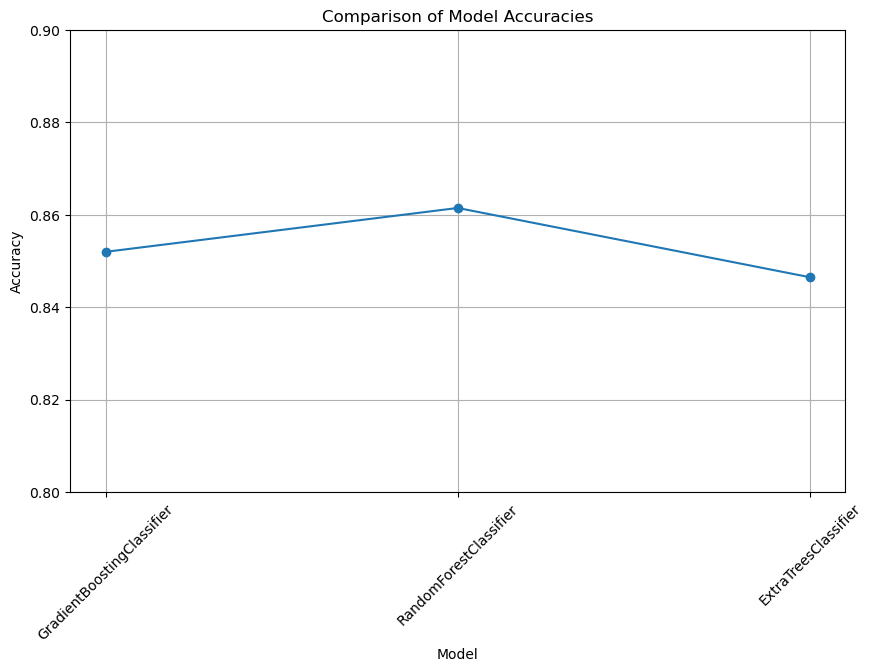

In [58]:
import matplotlib.pyplot as plt

accuracies = [accuracy_GradientBoosting, accuracy_RandomForest, accuracy_ExtraTrees]

model_names = ["GradientBoostingClassifier", "RandomForestClassifier", "ExtraTreesClassifier"] 

plt.figure(figsize=(10, 6))
plt.plot(model_names, accuracies, marker='o')
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.ylim([0.8, 0.9]) 
plt.xticks(rotation=45) 
plt.grid(True) 
plt.show()

### Feed Forward Neural Network (FNN)

In [59]:
y_train_NN = pd.get_dummies(y_train).values
print(y_train_NN)

[[1 0]
 [1 0]
 [0 1]
 ...
 [0 1]
 [0 1]
 [1 0]]


In [60]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [61]:
model_FNN = Sequential()
model_FNN.add(Dense(256, activation='relu'))
model_FNN.add(Dense(128, activation='relu'))
model_FNN.add(Dense(64, activation='relu'))
model_FNN.add(Dense(32, activation='relu'))
model_FNN.add(Dense(16, activation='relu'))
model_FNN.add(Dense(2, activation='softmax'))

In [62]:
model_FNN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model_FNN.fit(x_train, y_train_NN, epochs=30, batch_size=10, validation_split=0.1)

Epoch 1/30
720/720 [==============================] - 8s 7ms/step - loss: 0.4682 - accuracy: 0.8006 - val_loss: 0.4057 - val_accuracy: 0.8425
Epoch 2/30
720/720 [==============================] - 4s 6ms/step - loss: 0.4063 - accuracy: 0.8340 - val_loss: 0.3824 - val_accuracy: 0.8413
Epoch 3/30
720/720 [==============================] - 4s 6ms/step - loss: 0.3741 - accuracy: 0.8468 - val_loss: 0.3636 - val_accuracy: 0.8512
Epoch 4/30
720/720 [==============================] - 4s 6ms/step - loss: 0.3610 - accuracy: 0.8518 - val_loss: 0.3545 - val_accuracy: 0.8525
Epoch 5/30
720/720 [==============================] - 4s 6ms/step - loss: 0.3540 - accuracy: 0.8517 - val_loss: 0.3446 - val_accuracy: 0.8575
Epoch 6/30
720/720 [==============================] - 4s 6ms/step - loss: 0.3503 - accuracy: 0.8587 - val_loss: 0.3465 - val_accuracy: 0.8562
Epoch 7/30
720/720 [==============================] - 4s 6ms/step - loss: 0.3500 - accuracy: 0.8567 - val_loss: 0.3439 - val_accuracy: 0.8487
Epoch 

### Biểu đồ accuracy và val_accuracy của Feed Forward Neural Network

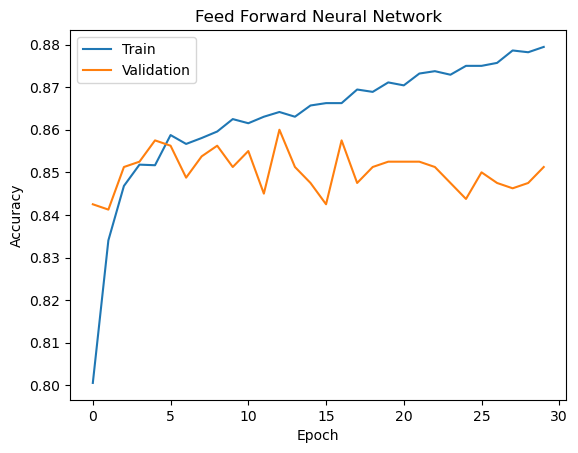

In [63]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Feed Forward Neural Network')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [64]:
y_pred_FNN = model_FNN.predict(x_test)
y_pred_FNN = np.argmax(y_pred_FNN, axis=1)
print(y_pred_FNN)
print(y_test)

63/63 [==============================] - 1s 4ms/step
[0 0 0 ... 1 0 0]
[0. 0. 0. ... 1. 1. 1.]


In [65]:
print("Feed Forward Neural Network:")
print(classification_report(y_test, y_pred_FNN))
accuracy_FNN = accuracy_score(y_test, y_pred_FNN)

Feed Forward Neural Network:
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91      1607
         1.0       0.72      0.44      0.54       393

    accuracy                           0.86      2000
   macro avg       0.80      0.70      0.73      2000
weighted avg       0.84      0.86      0.84      2000



###  Reccurent Neural Network (hoặc mô thuộc loại này :LSTM)

In [66]:
X_train_LSTM = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [67]:
from keras.layers import LSTM, Dense
model_LSTM = Sequential()
model_LSTM.add(LSTM(100, input_shape=(X_train_LSTM.shape[1], X_train_LSTM.shape[2])))
model_LSTM.add(Dense(2, activation='softmax'))

In [68]:
model_LSTM.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

hist = model_LSTM.fit(X_train_LSTM, y_train_NN, epochs=30, batch_size=64,  validation_split=0.1)

Epoch 1/30
113/113 [==============================] - 11s 38ms/step - loss: 0.5240 - accuracy: 0.7935 - val_loss: 0.4920 - val_accuracy: 0.8037
Epoch 2/30
113/113 [==============================] - 3s 25ms/step - loss: 0.5101 - accuracy: 0.7935 - val_loss: 0.4911 - val_accuracy: 0.8037
Epoch 3/30
113/113 [==============================] - 3s 25ms/step - loss: 0.5049 - accuracy: 0.7935 - val_loss: 0.4800 - val_accuracy: 0.8037
Epoch 4/30
113/113 [==============================] - 3s 25ms/step - loss: 0.4977 - accuracy: 0.7935 - val_loss: 0.4729 - val_accuracy: 0.8037
Epoch 5/30
113/113 [==============================] - 3s 25ms/step - loss: 0.4854 - accuracy: 0.7947 - val_loss: 0.4368 - val_accuracy: 0.8062
Epoch 6/30
113/113 [==============================] - 3s 25ms/step - loss: 0.4657 - accuracy: 0.7994 - val_loss: 0.4336 - val_accuracy: 0.8100
Epoch 7/30
113/113 [==============================] - 3s 25ms/step - loss: 0.4577 - accuracy: 0.7983 - val_loss: 0.4236 - val_accuracy: 0.821

### Biểu đồ accuracy và val_accuracy của LSTM

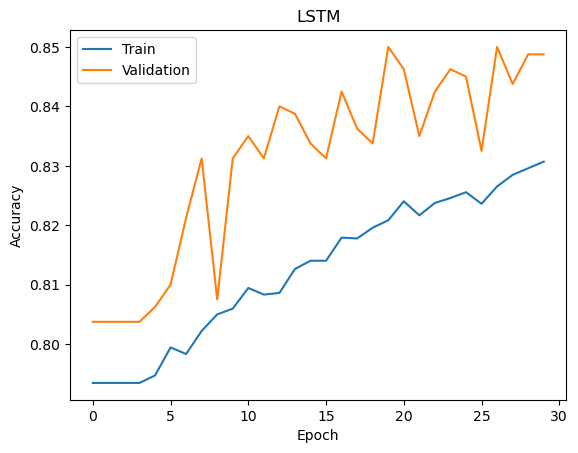

In [69]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('LSTM')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [70]:
y_pred_LSTM = model_LSTM.predict(x_test)
y_pred_LSTM = np.argmax(y_pred_LSTM, axis=1)
print(y_pred_LSTM)
print(y_test)

63/63 [==============================] - 2s 9ms/step
[0 0 0 ... 0 0 0]
[0. 0. 0. ... 1. 1. 1.]


In [71]:
print("LSTM:")
print(classification_report(y_test, y_pred_LSTM))
accuracy_LSTM = accuracy_score(y_test, y_pred_LSTM)

LSTM:
              precision    recall  f1-score   support

         0.0       0.84      0.97      0.90      1607
         1.0       0.72      0.27      0.39       393

    accuracy                           0.84      2000
   macro avg       0.78      0.62      0.65      2000
weighted avg       0.82      0.84      0.80      2000



### Áp dụng các kĩ thuật tránh Overfiting

### LogisticRegression

Áp dụng regularization (L2 regularization) trong Logistic Regression

In [72]:
logreg = LogisticRegression(penalty='l2', C=1.0)

logreg.fit(x_train, y_train)
y_pred_log = Logistic_reg.predict(x_test)

print("LogisticRegression:")
print(classification_report(y_test, y_pred_log))
accuracy_Logistic = accuracy_score(y_test, y_pred_log)

LogisticRegression:
              precision    recall  f1-score   support

         0.0       0.83      0.97      0.89      1607
         1.0       0.61      0.17      0.27       393

    accuracy                           0.82      2000
   macro avg       0.72      0.57      0.58      2000
weighted avg       0.79      0.82      0.77      2000



### K-Nearest Neighbors

Tìm giá trị k tốt nhất bằng cross-validation

In [73]:
best_k = None
best_accuracy = 0

for k in range(1, 20):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k
final_model = KNeighborsClassifier(n_neighbors=best_k)
final_model.fit(x_train, y_train)
final_y_pred = final_model.predict(x_test)
print(classification_report(y_test, final_y_pred))
accuracy_KNN = accuracy_score(y_test, final_y_pred)

              precision    recall  f1-score   support

         0.0       0.84      0.98      0.90      1607
         1.0       0.70      0.22      0.33       393

    accuracy                           0.83      2000
   macro avg       0.77      0.60      0.62      2000
weighted avg       0.81      0.83      0.79      2000



### DecisionTree

Xây dựng mô hình Decision Tree với các tham số điều chỉnh

In [74]:
model_tree = DecisionTreeClassifier(
    max_depth=3,
    min_samples_split=5,
    min_samples_leaf=2, 
    max_features=None   
)
model_tree.fit(x_train, y_train)
y_pred = model_tree.predict(x_test)
print(classification_report(y_test, y_pred))
accuracy_tree = accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91      1607
         1.0       0.68      0.43      0.53       393

    accuracy                           0.85      2000
   macro avg       0.78      0.69      0.72      2000
weighted avg       0.83      0.85      0.83      2000



### Gaussian

Sử dụng Feature selection

In [75]:
from sklearn.feature_selection import SelectKBest, f_classif
k_best = SelectKBest(f_classif, k=8)
X_train_selected = k_best.fit_transform(x_train, y_train)
X_test_selected = k_best.transform(x_test)

model_nb = GaussianNB()
model_nb.fit(X_train_selected, y_train)
y_pred_nb = model_nb.predict(X_test_selected)
print(classification_report(y_test, y_pred_nb))
accuracy_nb = accuracy_score(y_test, y_pred_nb)

              precision    recall  f1-score   support

         0.0       0.84      0.97      0.90      1607
         1.0       0.69      0.24      0.36       393

    accuracy                           0.83      2000
   macro avg       0.77      0.61      0.63      2000
weighted avg       0.81      0.83      0.79      2000



### GradientBoostingClassifier

Huấn luyện với early stopping

In [76]:
gb_clf = GradientBoostingClassifier(n_estimators=100, validation_fraction=0.1, n_iter_no_change=5, tol=0.01)
gb_clf.fit(x_train, y_train)
y_pred = gb_clf.predict(x_test)
print("GradientBoostingClassifier:")
print(classification_report(y_test, y_pred))
accuracy_GradientBoosting = accuracy_score(y_test, y_pred)

GradientBoostingClassifier:
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92      1607
         1.0       0.79      0.40      0.53       393

    accuracy                           0.86      2000
   macro avg       0.83      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000



### RandomForestClassifier

Điều chỉnh lại tham số max_depth

In [80]:
from sklearn.ensemble import RandomForestClassifier
clf_2 = RandomForestClassifier(n_estimators=10, max_depth=7, min_samples_split=2, random_state=0).fit(x_train, y_train)
y_pred= clf_2.predict(x_test)
print("RandomForestClassifier:")
print(classification_report(y_test, y_pred))
accuracy_RandomForest = accuracy_score(y_test, y_pred)

RandomForestClassifier:
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92      1607
         1.0       0.75      0.40      0.53       393

    accuracy                           0.86      2000
   macro avg       0.81      0.69      0.72      2000
weighted avg       0.85      0.86      0.84      2000



### ExtraTreesClassifier

In [78]:
from sklearn.ensemble import ExtraTreesClassifier
clf_3 = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, min_samples_leaf=5, random_state=0).fit(x_train, y_train)
y_pred= clf_3.predict(x_test)
print("ExtraTreesClassifier:")
print(classification_report(y_test, y_pred))
accuracy_ExtraTrees = accuracy_score(y_test, y_pred)

ExtraTreesClassifier:
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92      1607
         1.0       0.80      0.38      0.51       393

    accuracy                           0.86      2000
   macro avg       0.83      0.68      0.72      2000
weighted avg       0.85      0.86      0.84      2000



### Feed Forward Neural Network (FNN)

Dropout is a regularization technique where randomly selected neurons are ignored during training. It helps prevent overfitting.

In [130]:
from keras.optimizers import Adam
adam = Adam(learning_rate=5e-4)

In [131]:
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', 
                                patience=3, 
                                verbose=1, 
                                factor=0.2, 
                                min_lr=1e-6)

In [83]:
from keras.layers import Dropout

model_FNN = Sequential()
model_FNN.add(Dense(256, activation='relu'))
model_FNN.add(Dropout(0.5))
model_FNN.add(Dense(128, activation='relu'))
model_FNN.add(Dense(64, activation='relu'))
model_FNN.add(Dense(32, activation='relu'))
model_FNN.add(Dense(16, activation='relu'))
model_FNN.add(Dense(16, activation='relu'))
model_FNN.add(Dense(2, activation='softmax'))

model_FNN.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
hist = model_FNN.fit(x_train, y_train_NN, epochs=30, batch_size=10, validation_split=0.1,  callbacks=[reduce_lr])

y_pred_FNN = model_FNN.predict(x_test)
y_pred_FNN = np.argmax(y_pred_FNN, axis=1)

print("Feed Forward Neural Network:")
print(classification_report(y_test, y_pred_FNN))
accuracy_FNN = accuracy_score(y_test, y_pred_FNN)

Epoch 1/30
720/720 [==============================] - 8s 7ms/step - loss: 0.4946 - accuracy: 0.7906 - val_loss: 0.4423 - val_accuracy: 0.8213 - lr: 5.0000e-04
Epoch 2/30
720/720 [==============================] - 5s 6ms/step - loss: 0.4499 - accuracy: 0.8067 - val_loss: 0.4062 - val_accuracy: 0.8338 - lr: 5.0000e-04
Epoch 3/30
720/720 [==============================] - 4s 6ms/step - loss: 0.4346 - accuracy: 0.8193 - val_loss: 0.3806 - val_accuracy: 0.8475 - lr: 5.0000e-04
Epoch 4/30
720/720 [==============================] - 5s 6ms/step - loss: 0.4159 - accuracy: 0.8292 - val_loss: 0.3742 - val_accuracy: 0.8525 - lr: 5.0000e-04
Epoch 5/30
720/720 [==============================] - 5s 6ms/step - loss: 0.3929 - accuracy: 0.8400 - val_loss: 0.3484 - val_accuracy: 0.8587 - lr: 5.0000e-04
Epoch 6/30
720/720 [==============================] - 5s 6ms/step - loss: 0.3852 - accuracy: 0.8431 - val_loss: 0.3582 - val_accuracy: 0.8575 - lr: 5.0000e-04
Epoch 7/30
720/720 [==========================

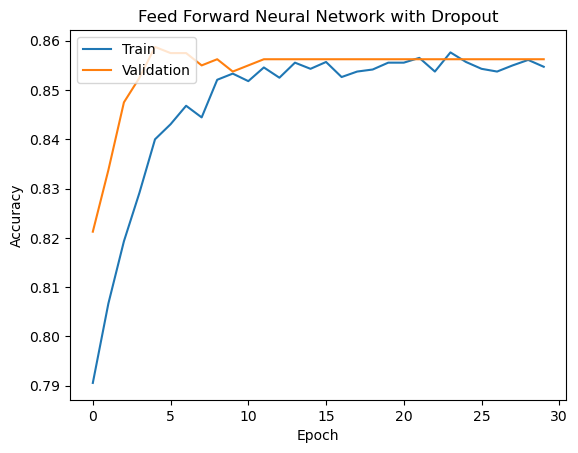

In [84]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Feed Forward Neural Network with Dropout')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### LSTM

Dropout is a regularization technique where randomly selected neurons are ignored during training. It helps prevent overfitting

In [87]:
X_train_LSTM = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [94]:
from keras.layers import LSTM, Dense
from keras.layers import Dropout

model_LSTM = Sequential()
model_LSTM.add(LSTM(100, input_shape=(X_train_LSTM.shape[1], X_train_LSTM.shape[2])))
model_LSTM.add(Dropout(0.5))
model_LSTM.add(Dense(2, activation='softmax'))

model_LSTM.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model_LSTM.fit(X_train_LSTM, y_train_NN, epochs=30, batch_size=10,  validation_split=0.1, shuffle=False )

Epoch 1/30
720/720 [==============================] - 16s 15ms/step - loss: 0.5176 - accuracy: 0.7929 - val_loss: 0.4927 - val_accuracy: 0.8037
Epoch 2/30
720/720 [==============================] - 10s 13ms/step - loss: 0.5124 - accuracy: 0.7935 - val_loss: 0.4853 - val_accuracy: 0.8037
Epoch 3/30
720/720 [==============================] - 10s 14ms/step - loss: 0.5026 - accuracy: 0.7935 - val_loss: 0.4766 - val_accuracy: 0.8037
Epoch 4/30
720/720 [==============================] - 10s 13ms/step - loss: 0.5010 - accuracy: 0.7935 - val_loss: 0.4739 - val_accuracy: 0.8037
Epoch 5/30
720/720 [==============================] - 9s 13ms/step - loss: 0.4974 - accuracy: 0.7935 - val_loss: 0.4719 - val_accuracy: 0.8037
Epoch 6/30
720/720 [==============================] - 9s 13ms/step - loss: 0.4955 - accuracy: 0.7935 - val_loss: 0.4716 - val_accuracy: 0.8037
Epoch 7/30
720/720 [==============================] - 9s 13ms/step - loss: 0.4952 - accuracy: 0.7935 - val_loss: 0.4703 - val_accuracy: 0.

In [95]:
y_pred_LSTM = model_LSTM.predict(x_test)
y_pred_LSTM = np.argmax(y_pred_LSTM, axis=1)

print("LSTM:")
print(classification_report(y_test, y_pred_LSTM))
accuracy_LSTM = accuracy_score(y_test, y_pred_LSTM)

63/63 [==============================] - 3s 11ms/step
LSTM:
              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92      1607
         1.0       0.73      0.50      0.60       393

    accuracy                           0.87      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



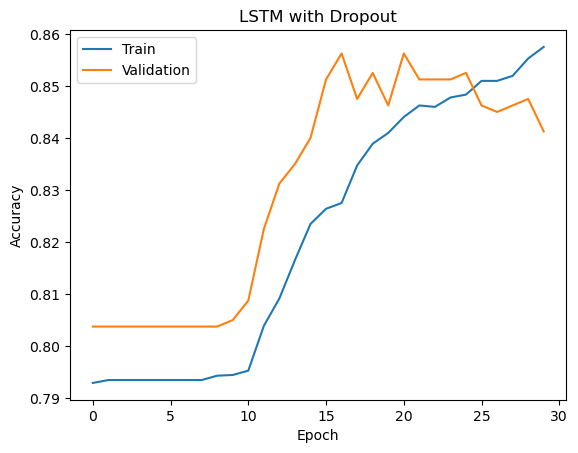

In [96]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('LSTM with Dropout')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Sau khi huấn luyện xong mô hình, cải thiện độ chính xác

Để cải thiện độ chính xác của mô hình học máy sau khi huấn luyện xong, ta có thể thực hiện một số cách sau:
1. Tăng kích thước dữ liệu huấn luyện: Mô hình càng được huấn luyện trên nhiều dữ liệu thì càng có khả năng học được các mối quan hệ phức tạp và chính xác hơn. Tuy nhiên, việc thu thập dữ liệu huấn luyện có thể tốn kém và mất thời gian.
2. Chọn thuật toán học máy phù hợp: Mỗi thuật toán học máy có những ưu điểm và nhược điểm riêng. Việc lựa chọn thuật toán phù hợp với bài toán cụ thể sẽ giúp cải thiện độ chính xác của mô hình.
3. Tối ưu tham số của mô hình: Các tham số của mô hình là những giá trị quyết định cách thức hoạt động của mô hình. Việc tối ưu tham số của mô hình sẽ giúp mô hình đạt được hiệu suất tốt nhất.
4. Áp dụng các kỹ thuật Regularization: Regularization là các kỹ thuật giúp giảm thiểu sự quá khớp (overfitting) của mô hình. Sự quá khớp xảy ra khi mô hình học quá nhiều chi tiết của dữ liệu huấn luyện, dẫn đến việc mô hình không thể dự đoán chính xác dữ liệu mới.

Phân tích các trường hợp sai

Các trường hợp sai của các mô hình là do có một số feature không quan trọng gây nhiễu làm sai lầm cho việc dự đoán, nên cách cải thiện độ chính xác cho các mô hình sử dụng phương pháp feature selection để chọn ra các feature.

In [135]:
from sklearn.feature_selection import RFE
selector_RFE = RFE(Logistic_reg, n_features_to_select=8, step=1)
selector_RFE = selector_RFE.fit(x_train, y_train)
selected_features_RFE = [name[i] for i in range(len(selector_RFE.support_)) if selector_RFE.support_[i]]
print("Selected Features: ", selected_features_RFE)
selected_indices_RFE = np.where(selector_RFE.support_)[0]
x_train_RFE = x_train[:, selected_indices_RFE]
x_test_RFE = x_test[:, selected_indices_RFE]

Selected Features:  ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'IsActiveMember']


Sử dụng các feature mới cho huấn luyện mô hình LogisticRegression , FNN và RandomForestClassifier

In [136]:
Logistic_reg = LogisticRegression(penalty='l2', C=1.0)
Logistic_reg.fit(x_train_RFE, y_train)
y_pred_log = Logistic_reg.predict(x_test_RFE)
print("LogisticRegression:")
print(classification_report(y_test, y_pred_log))
accuracy_log = accuracy_score(y_test, y_pred_log)

LogisticRegression:
              precision    recall  f1-score   support

         0.0       0.83      0.97      0.90      1607
         1.0       0.62      0.18      0.27       393

    accuracy                           0.82      2000
   macro avg       0.73      0.57      0.58      2000
weighted avg       0.79      0.82      0.77      2000



In [137]:
from sklearn.ensemble import RandomForestClassifier
clf_2 = RandomForestClassifier(n_estimators=10, max_depth=10, min_samples_split=2, random_state=0).fit(x_train_RFE, y_train)
y_pred= clf_2.predict(x_test_RFE)
print("RandomForestClassifier:")
print(classification_report(y_test, y_pred))
accuracy_RandomForest = accuracy_score(y_test, y_pred)

RandomForestClassifier:
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92      1607
         1.0       0.80      0.41      0.55       393

    accuracy                           0.86      2000
   macro avg       0.84      0.69      0.73      2000
weighted avg       0.86      0.86      0.85      2000



In [142]:
from keras.layers import Dropout
from keras.optimizers import Adam
adam = Adam(learning_rate=5e-4)

from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', 
                                patience=3, 
                                verbose=1, 
                                factor=0.2, 
                                min_lr=1e-6)

model_FNN = Sequential()
model_FNN.add(Dense(256, activation='relu'))
model_FNN.add(Dropout(0.5))
model_FNN.add(Dense(128, activation='relu'))
model_FNN.add(Dense(64, activation='relu'))
model_FNN.add(Dense(32, activation='relu'))
model_FNN.add(Dense(16, activation='relu'))
model_FNN.add(Dense(16, activation='relu'))
model_FNN.add(Dense(2, activation='softmax'))

model_FNN.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
hist = model_FNN.fit(x_train_RFE, y_train_NN, epochs=30, batch_size=10, validation_split=0.1,  callbacks=[reduce_lr])

y_pred_FNN = model_FNN.predict(x_test_RFE)
y_pred_FNN = np.argmax(y_pred_FNN, axis=1)

print("Feed Forward Neural Network:")
print(classification_report(y_test, y_pred_FNN))
accuracy_FNN = accuracy_score(y_test, y_pred_FNN)

Epoch 1/30
720/720 [==============================] - 5s 4ms/step - loss: 0.4789 - accuracy: 0.7949 - val_loss: 0.4128 - val_accuracy: 0.8388 - lr: 5.0000e-04
Epoch 2/30
720/720 [==============================] - 3s 4ms/step - loss: 0.4394 - accuracy: 0.8186 - val_loss: 0.3854 - val_accuracy: 0.8375 - lr: 5.0000e-04
Epoch 3/30
720/720 [==============================] - 3s 4ms/step - loss: 0.4095 - accuracy: 0.8292 - val_loss: 0.3667 - val_accuracy: 0.8413 - lr: 5.0000e-04
Epoch 4/30
720/720 [==============================] - 3s 4ms/step - loss: 0.3900 - accuracy: 0.8404 - val_loss: 0.3492 - val_accuracy: 0.8587 - lr: 5.0000e-04
Epoch 5/30
720/720 [==============================] - 3s 4ms/step - loss: 0.3780 - accuracy: 0.8457 - val_loss: 0.3436 - val_accuracy: 0.8562 - lr: 5.0000e-04
Epoch 6/30
720/720 [==============================] - 3s 4ms/step - loss: 0.3750 - accuracy: 0.8474 - val_loss: 0.3471 - val_accuracy: 0.8537 - lr: 5.0000e-04
Epoch 7/30
712/720 [==========================

Kết luận: Phương pháp feature selection thật sự có hiệu quả đối với việc cải thiện độ chính xác của cách mô hình học máy nhưng tùy vào dataset mà nó đem lại kết quả cải thiện nhiều hay ít.